# Diabetes Disease Classifier

## Problem Statement
The main problem associated with this project is to be able to predict whether an individual is likely to have diabetes or not in the surest way possible.

## Data 
The data being used to make this prediction was gotten from kaggle.
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Evaluation
This model should be able to achieve a very much high accuracy with very low errors as possible. Therefore a high precision is what defines success for us

## Features
The datasets consists of several medical predictor variables and one target variable, Outcome. 
Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Modeling
This problem is a classification problem therefore we will be evaluating and modeling using atleast 2 or more classification algorithms such as <code> RandomForestClassifier </code> etc.

## Experimentation
If the model was not able to achieve a high precision score then we perform hyperparameter tuning on our chosen model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read and get the data ready
df = pd.read_csv('diabetes.csv', low_memory=False)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


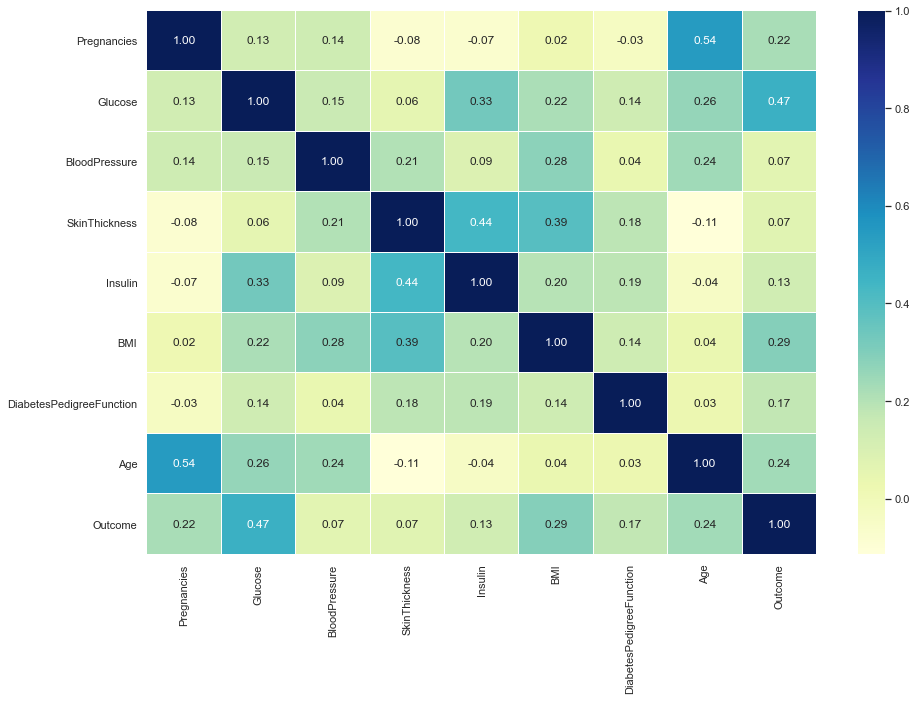

In [6]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='YlGnBu', linewidths=.05);

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Age Distribution

In [8]:
df.Age.value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
52     8
44     8
50     8
51     8
58     7
54     6
47     6
53     5
60     5
49     5
57     5
48     5
66     4
62     4
63     4
55     4
59     3
56     3
65     3
67     3
61     2
69     2
64     1
68     1
70     1
72     1
81     1
Name: Age, dtype: int64

In [9]:
pd.crosstab(df.Age, df.Outcome)

Outcome,0,1
Age,,
21,58,5
22,61,11
23,31,7
24,38,8
25,34,14
26,25,8
27,24,8
28,25,10
29,16,13


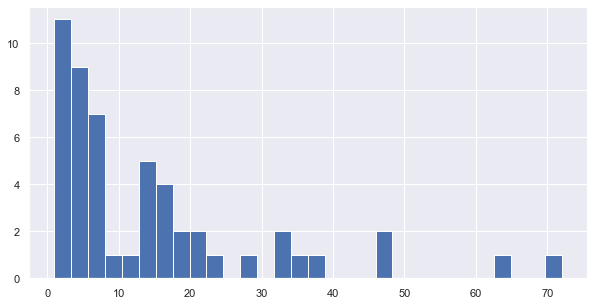

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(df.Age.value_counts(),bins=30);

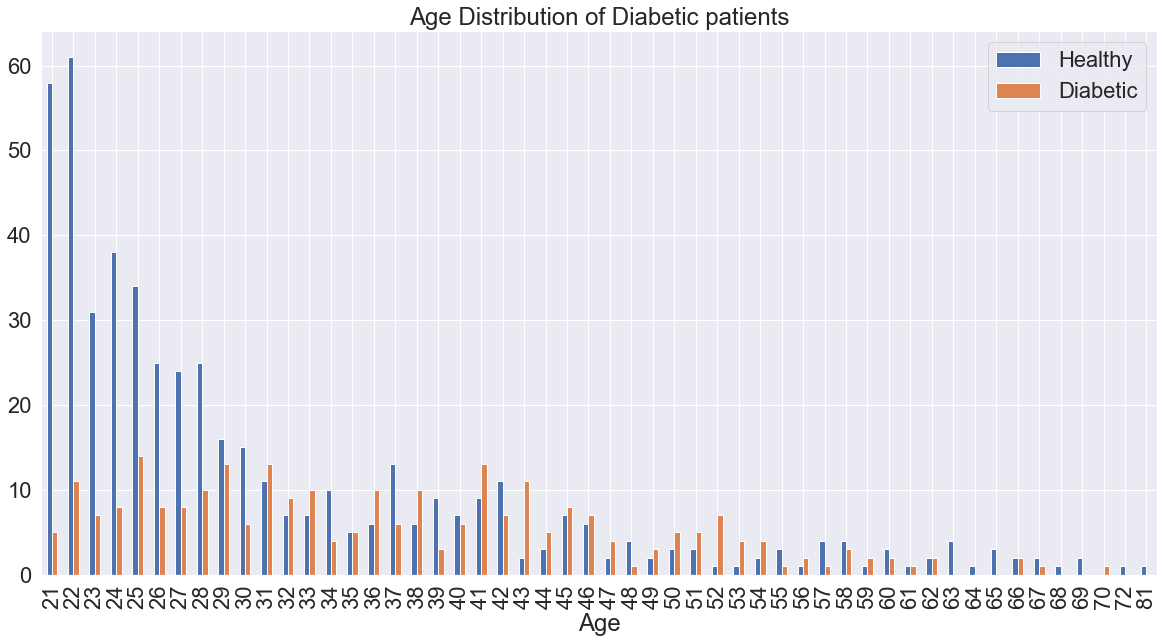

In [11]:
sns.set(font_scale=2)
pd.crosstab(df.Age, df.Outcome).plot(kind='bar', figsize=(20,10))
plt.legend(['Healthy','Diabetic'])
plt.title('Age Distribution of Diabetic patients');

## Modeling

In [12]:
# Shuffle the dataset
df = df.sample(frac=1)

# Split the data into features and labels
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Split the data into diabetic and non diabetic
diabetic = df[df['Outcome'] == 1]
non_diabetic = df[df['Outcome'] == 0]

outlier_fraction = round(len(diabetic)/float(len(non_diabetic)),1)
outlier_fraction

0.5

In [22]:
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import LocalOutlierFactor

# Instantiate the Estimators
rf_model = RandomForestClassifier(n_jobs=-1, random_state=42)
log_model = LogisticRegression(n_jobs = -1, random_state=42)
iso_model = IsolationForest(max_samples = 'auto', contamination=outlier_fraction, random_state=42)
local_model = LocalOutlierFactor(n_neighbors=30, contamination=outlier_fraction)

In [23]:
# Import Evaluation modules
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((652, 8), (652,), (116, 8), (116,))

In [35]:
# Fit the Data to the estimators
rf_model.fit(X_train, y_train)
log_model.fit(X_train, y_train)
iso_model.fit(X_train, y_train)
local_model.fit(X_train, y_train)

LocalOutlierFactor(contamination=0.5, n_neighbors=30)

In [36]:
def eval_model(model, X_test=X_test, y_test=X_test):
    # Make prediction
    y_preds = model.predict(X_test)
    
    evaluations = {
        'Cross Val Score': cross_val_score(model,X,y, cv=5),
        'Accuracy Score': accuracy_score(y_test, y_preds),
    }
    print(classification_report(y_test, y_preds))
    
    #Plot A confusion matrix graph
    conf_mat = pd.crosstab(y_test, y_preds, rownames=['Actual'], colnames=['Predicted'])
    fig, ax = plt.subplots(figsize=(10,5))
    ax = sns.heatmap(conf_mat, annot=True, cmap='YlGnBu');
    ax.set(title='Confusion Matrix');
    
    return evaluations
    

In [37]:
models = {
        'RandomForestClassifier': rf_model,
        'Logistic Regression': log_model,
        'Isolation Forest': iso_model,
        'Local Outlier Factor': local_model,
    }

for key, model in models.items():
    if key == 'Local Outlier Factor':
        y_pred = model.fit_predict(X_test)
        scores_pred = model.negative_outlier_factor_
        y_pred[y_pred == 1] = 0
        y_pred[y_pred == -1] = 1
        
    elif key == 'Isolation Forest':
        y_pred = model.predict(X_test)
        scores_pred = model.decision_function(X)
        y_pred[y_pred == 1] = 0
        y_pred[y_pred == -1] = 1
    else:
        y_pred = model.predict(X_test)
    
    n_errors = (y_pred != y_test).sum()
    
    print(f'{key}: {n_errors}')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('---------------------------------------------------')

RandomForestClassifier: 26
Accuracy: 0.7758620689655172
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        76
           1       0.72      0.57      0.64        40

    accuracy                           0.78       116
   macro avg       0.76      0.73      0.74       116
weighted avg       0.77      0.78      0.77       116

[[67  9]
 [17 23]]
---------------------------------------------------
Logistic Regression: 26
Accuracy: 0.7758620689655172
              precision    recall  f1-score   support

           0       0.78      0.92      0.84        76
           1       0.77      0.50      0.61        40

    accuracy                           0.78       116
   macro avg       0.77      0.71      0.72       116
weighted avg       0.77      0.78      0.76       116

[[70  6]
 [20 20]]
---------------------------------------------------
Isolation Forest: 47
Accuracy: 0.5948275862068966
              precision    recall  f1-score  

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        76
           1       0.72      0.57      0.64        40

    accuracy                           0.78       116
   macro avg       0.76      0.73      0.74       116
weighted avg       0.77      0.78      0.77       116



{'Cross Val Score': array([0.77272727, 0.75974026, 0.7987013 , 0.73202614, 0.76470588]),
 'Accuracy Score': 0.7758620689655172}

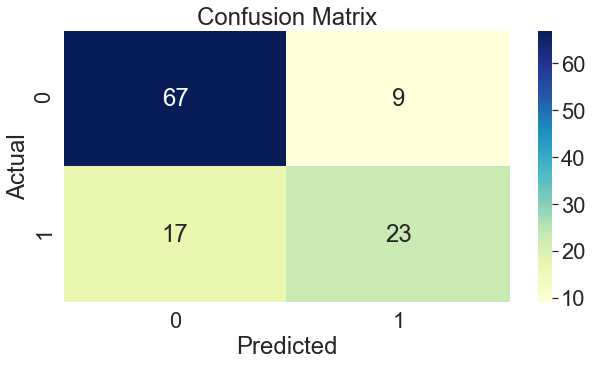

In [38]:
eval_model(rf_model,X_test, y_test)

In [39]:
y_preds = rf_model.predict(X_test)
pd.crosstab(y_test, y_preds, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,67,9
1,17,23


## Experimentation

In [40]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### Randomized Search CV
**Improve RandomForestClassifier**

In [56]:
rf_grid = {
    'n_estimators': np.arange(10,1200, 50),
    'max_features': ['auto','sqrt'],
    'max_depth': np.arange(0,50,2),
    'min_samples_split':np.arange(10,50,5),
    'min_samples_leaf': np.arange(1,10,2),
}

rs_model = RandomizedSearchCV(estimator=rf_model,param_distributions=rf_grid,n_jobs=1, scoring='precision', verbose=True)

In [57]:
# Fit the rs_model
rs_model.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [58]:
best_param = pd.DataFrame(rs_model.best_params_, index=['Params'])
best_param

,n_estimators,min_samples_split,min_samples_leaf,max_features,max_depth
Params,510,30,9,auto,2


In [59]:
rs_model.score(X_test, y_test)

0.7

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\AC Nice\Documents\DATA SCIENCE PROJECT\env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\AC Nice\Documents\DATA SCIENCE PROJECT\env\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\AC Nice\Documents\DATA SCIENCE PROJECT\env\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\AC Nice\Documents\DATA SCIENCE PROJECT\env\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\AC Nice\Documents\DATA SCIENCE PROJECT\env\lib\site-packages\joblib\parallel.py", line 262, in __call__
    retu

C:\Users\AC Nice\Documents\DATA SCIENCE PROJECT\env\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\AC Nice\Documents\DATA SCIENCE PROJECT\env\lib\site-packages\joblib\externals\loky\process_executor.py", line 431, in _process_worker
    r = call_item()
  File "C:\Users\AC Nice\Documents\DATA SCIENCE PROJECT\env\lib\site-packages\joblib\externals\loky\process_executor.py", line 285, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\AC Nice\Documents\DATA SCIENCE PROJECT\env\lib\site-packages\joblib\_parallel_backends.py", line 595, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\AC Nice\Documents\DATA SCIENCE PROJECT\env\lib\site-packages\joblib\parallel.py", line 262, in __call__
    retu

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        76
           1       0.70      0.35      0.47        40

    accuracy                           0.72       116
   macro avg       0.71      0.64      0.64       116
weighted avg       0.72      0.72      0.69       116



{'Cross Val Score': array([0.79069767, 0.86956522, 0.79411765, 0.58139535, 0.65116279]),
 'Accuracy Score': 0.7241379310344828}

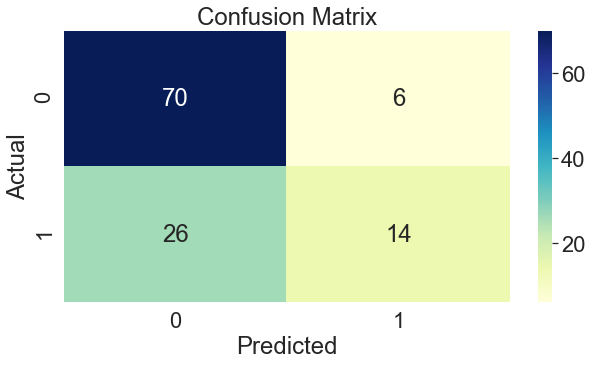

In [60]:
y_pred = rs_model.predict(X_test)
eval_model(rs_model, X_test, y_test)

**Improve Logistic Regression Classifier**

In [49]:
grid = {
    'tol': [0, 0.01, 0.1, 0.001, 0.2],
    'C': np.arange(1, 10, 1),
    'intercept_scaling': np.arange(1, 10, 2),
    'max_iter': np.linspace(10, 500, 100),
    'class_weight': np.linspace(0,50,100),
}

log_rs_model = RandomizedSearchCV(estimator=log_model, param_distributions=grid, n_iter=20, n_jobs=1, verbose=True)

In [50]:
log_rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=LogisticRegression(n_jobs=-1, random_state=42),
                   n_iter=20, n_jobs=1,
                   param_distributions={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'class_weight': array([ 0.        ,  0.50505051,  1.01010101,  1.51515152,  2.02020202,
        2.52525253,  3.03030303,  3.53535354,  4.04040404,  4.54545455,
        5.05050505,  5.55555556,  6.06060606,  6.56565657,  7.07070707,
        7.57575758,  8.08080808,  8.5...
       366.36363636, 371.31313131, 376.26262626, 381.21212121,
       386.16161616, 391.11111111, 396.06060606, 401.01010101,
       405.95959596, 410.90909091, 415.85858586, 420.80808081,
       425.75757576, 430.70707071, 435.65656566, 440.60606061,
       445.55555556, 450.50505051, 455.45454545, 460.4040404 ,
       465.35353535, 470.3030303 , 475.25252525, 480.2020202 ,
       485.15151515, 490.1010101 , 495.05050505, 500.        ]),
                                        'tol':

In [53]:
# eval_model(log_rs_model)
log_rs_model.best_params_

{'tol': 0,
 'max_iter': 376.26262626262627,
 'intercept_scaling': 9,
 'class_weight': 28.78787878787879,
 'C': 2}

In [54]:
improved_logistic_reg = LogisticRegression(tol=0, max_iter=376.26262626262627, 
                                          intercept_scaling=9, class_weight=28.78787878787879, C=2)
improved_logistic_reg.fit(X_train, y_train)
y_preds = improved_logistic_reg.predict(X_test)
print(classification_report(y_test, y_preds))

print(confusion_matrix(y_test, y_preds))
accuracy_score(y_test, y_preds)
print(cross_val_score(improved_logistic_reg,X,y))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        76
           1       0.69      0.50      0.58        40

    accuracy                           0.75       116
   macro avg       0.73      0.69      0.70       116
weighted avg       0.74      0.75      0.74       116

[[67  9]
 [20 20]]
[0.80519481 0.74675325 0.77922078 0.76470588 0.76470588]


### Grid Search CV
**Improve Logistic Regression**

In [62]:
# Try Improving using GridSearchCV

grid = {
    'tol': [0, 0.01, 0.1, 0.001, 0.2],
    'C': np.arange(1, 10, 1),
    'intercept_scaling': np.arange(1, 10, 2),
    'max_iter': np.linspace(10, 500, 100),
    'class_weight': np.linspace(0,50,10),
}

log_gs_model = GridSearchCV(estimator=log_model, param_grid=grid,n_jobs=-1, verbose=2)

In [ ]:
log_gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 225000 candidates, totalling 1125000 fits


In [64]:
eval_model(log_gs_model, X_test, y_test)

## Dump Model

In [66]:
from pickle import dump

In [67]:
dump(rf_model, open('diabetes.pkl','wb'))